<a href="https://colab.research.google.com/github/ianotiato/-AI_Tools_Assignment/blob/main/task1_iris_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)

Missing values: 0

Training set size: 120
Test set size: 30

MODEL PERFORMANCE METRICS
Accuracy: 0.9667
Precision: 0.9697
Recall: 0.9667

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



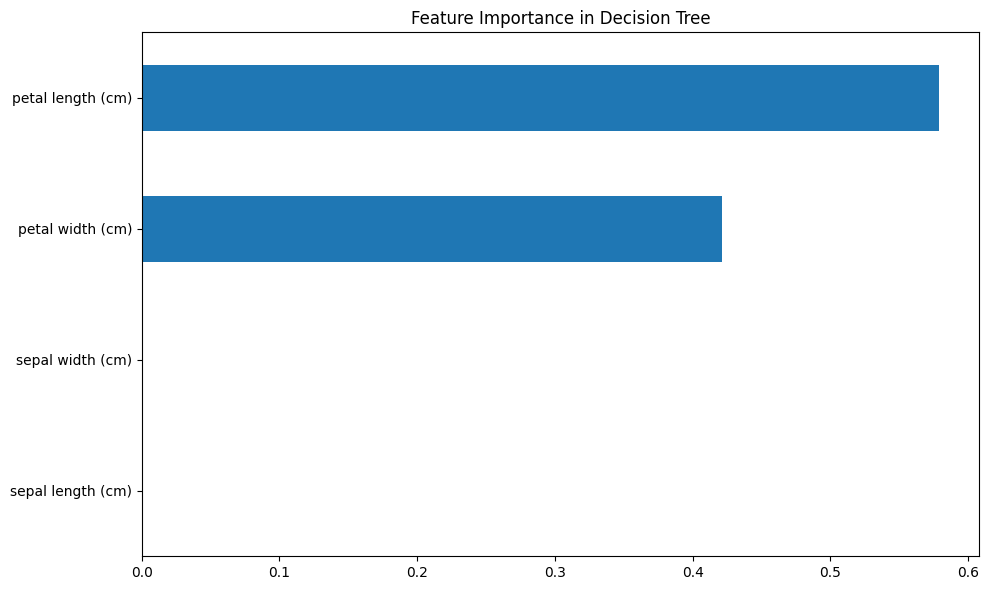

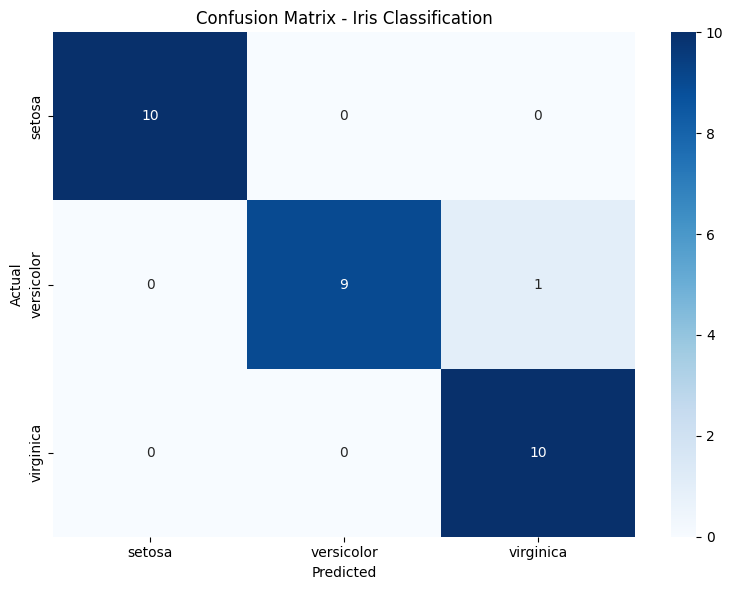

In [1]:
# Task 1: Iris Classification with Scikit-learn
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Dataset Overview:")
print(f"Features: {feature_names}")
print(f"Target classes: {target_names}")
print(f"Data shape: {X.shape}")

# Check for missing values
print(f"\nMissing values: {np.isnan(X).sum()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Train Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("\n" + "="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Feature importance visualization
plt.figure(figsize=(10, 6))
feature_imp = pd.Series(clf.feature_importances_, index=feature_names)
feature_imp.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance in Decision Tree')
plt.tight_layout()
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Iris Classification')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()